In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf

In [65]:
start_date = '2000-01-01'
end_date = '2023-12-10'
 
stock = "PAYTM.NS"

df = yf.download(stock, start_date, end_date)
df.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [66]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-18,1950.000000,1955.000000,1560.000000,1560.800049,1560.800049,23955434
1,2021-11-22,1509.000000,1519.000000,1271.000000,1359.599976,1359.599976,25114710
2,2021-11-23,1360.000000,1525.000000,1360.000000,1494.699951,1494.699951,12954174
3,2021-11-24,1503.000000,1785.000000,1502.949951,1752.449951,1752.449951,21541021
4,2021-11-25,1766.699951,1873.699951,1711.099976,1798.750000,1798.750000,13018344


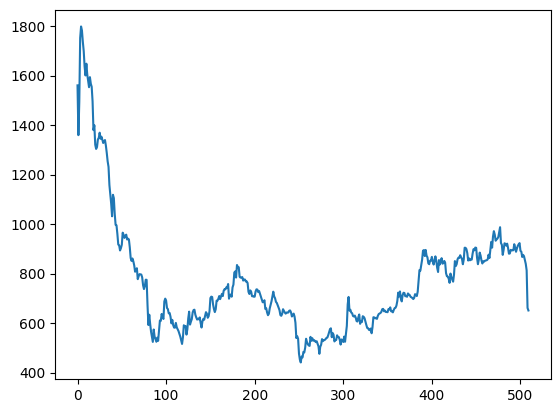

In [67]:
plt.plot(df.Close)

In [68]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
505    873.712999
506    873.871500
507    873.934500
508    872.000499
509    870.143499
Name: Close, Length: 510, dtype: float64

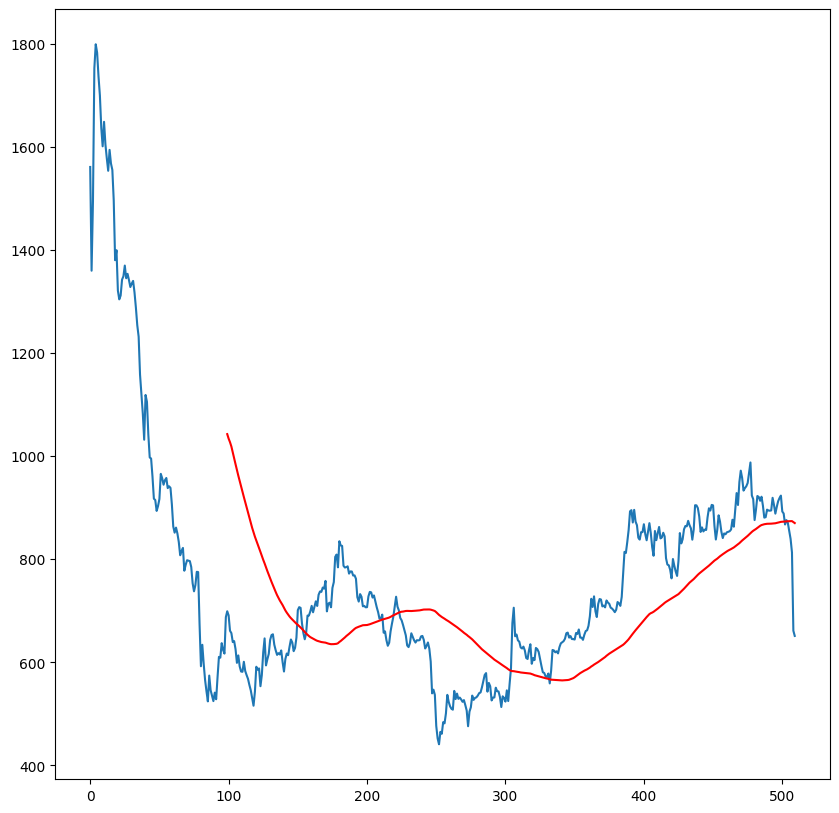

In [69]:
plt.figure(figsize = (10, 10))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [70]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
505    784.528499
506    785.195749
507    786.008249
508    786.044999
509    786.087749
Name: Close, Length: 510, dtype: float64

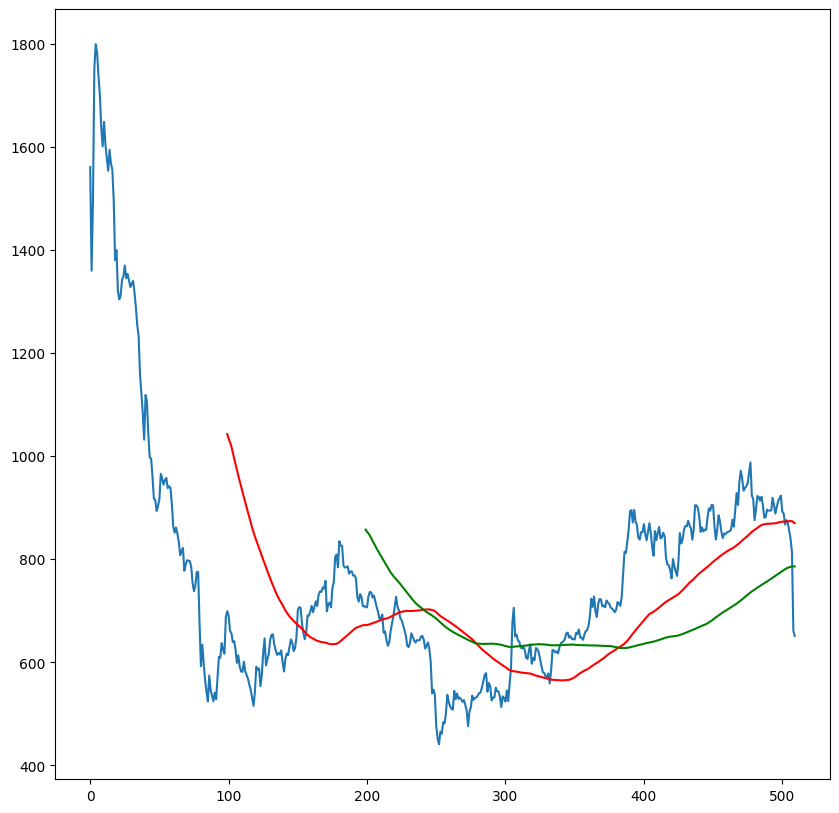

In [71]:
plt.figure(figsize = (10, 10))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [72]:
df.shape

(510, 7)

In [73]:
data_training = pd.DataFrame(df.Close[0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df.Close[int(len(df) * 0.70):int(len(df))])

print (data_training.shape)
print (data_testing.shape)

(357, 1)
(153, 1)


In [74]:
data_training.head()

,Close
0,1560.800049
1,1359.599976
2,1494.699951
3,1752.449951
4,1798.750000


In [75]:
data_testing.head()

,Close
357,653.599976
358,660.750000
359,662.150024
360,670.849976
361,689.599976


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [77]:
data_training_array = scaler.fit_transform(data_training) 
data_training_array.shape

(357, 1)

In [78]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)    

In [79]:
x_train.shape

(257, 100, 1)

In [80]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [81]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [83]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [84]:
model.fit(x_train, y_train, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
9/9 [==============================] - 8s 163ms/step - loss: 0.0134
Epoch 2/50
9/9 [==============================] - 1s 160ms/step - loss: 0.0038
Epoch 3/50
9/9 [==============================] - 1s 160ms/step - loss: 0.0034
Epoch 4/50
9/9 [==============================] - 1s 165ms/step - loss: 0.0033
Epoch 5/50
9/9 [==============================] - 2s 183ms/step - loss: 0.0033
Epoch 6/50
9/9 [==============================] - 2s 172ms/step - loss: 0.0028
Epoch 7/50
9/9 [==============================] - 1s 158ms/step - loss: 0.0032
Epoch 8/50
9/9 [==============================] - 1s 159ms/step - loss: 0.0030
Epoch 9/50
9/9 [==============================] - 1s 154ms/step - loss: 0.0024
Epoch 10/50
9/9 [==============================] - 1s 152ms/step - loss: 0.0024
Epoch 11/50
9/9 [==============================] - 1s 160ms/step - loss: 0.0024
Epoch 12/50
9/9 [==============================] - 1s 152ms/step - loss: 0.0023
Epoch 13/50
9/9 [==============================] 

In [85]:
model.save("LSTM_StockPrice.h5")

f:\upGrad\Projects\PredictStockPrice\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [86]:
past_100_days_test = data_training.tail(100)
data_testing_final = pd.concat([past_100_days_test, data_testing], ignore_index = True)
data_testing_final.shape

(253, 1)

In [87]:
data_testing_final_scale = scaler.fit_transform(data_testing_final)
data_testing_final_scale.shape

(253, 1)

In [88]:
x_test = []
y_test = []

for i in range(100, data_testing_final_scale.shape[0]):
    x_test.append(data_testing_final_scale[i-100:i])
    y_test.append(data_testing_final_scale[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)    

In [89]:
x_test.shape

(153, 100, 1)

In [90]:
y_test.shape

(153,)

In [91]:
y_predicted = model.predict(x_test)
y_predicted.shape

5/5 [==============================] - 1s 64ms/step


(153, 1)

In [92]:
scaler.scale_

array([0.00195484])

In [93]:
1/scaler.scale_

array([511.55001831])

In [94]:
scale_factor = 1/scaler.scale_
scale_factor

array([511.55001831])

In [95]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [96]:
y_predicted 

array([[132.44354023],
       [133.25073728],
       [133.93141295],
       [134.55601611],
       [135.21428106],
       [136.05445387],
       [137.33992895],
       [139.18042728],
       [141.67438826],
       [144.70675504],
       [148.02381402],
       [151.49172602],
       [155.06287972],
       [158.69838416],
       [162.28400573],
       [165.71278284],
       [168.88171772],
       [171.78843209],
       [174.44213415],
       [176.85026366],
       [178.96934079],
       [180.75750173],
       [182.19105517],
       [183.24627929],
       [183.94384683],
       [184.40834303],
       [184.75368134],
       [185.04197145],
       [185.39526785],
       [186.11902695],
       [187.65176682],
       [190.27802721],
       [194.20755402],
       [199.63768345],
       [206.7847779 ],
       [215.66048485],
       [225.91788045],
       [237.24251354],
       [249.09716746],
       [260.92200141],
       [272.10409021],
       [282.17793146],
       [290.94140192],
       [298

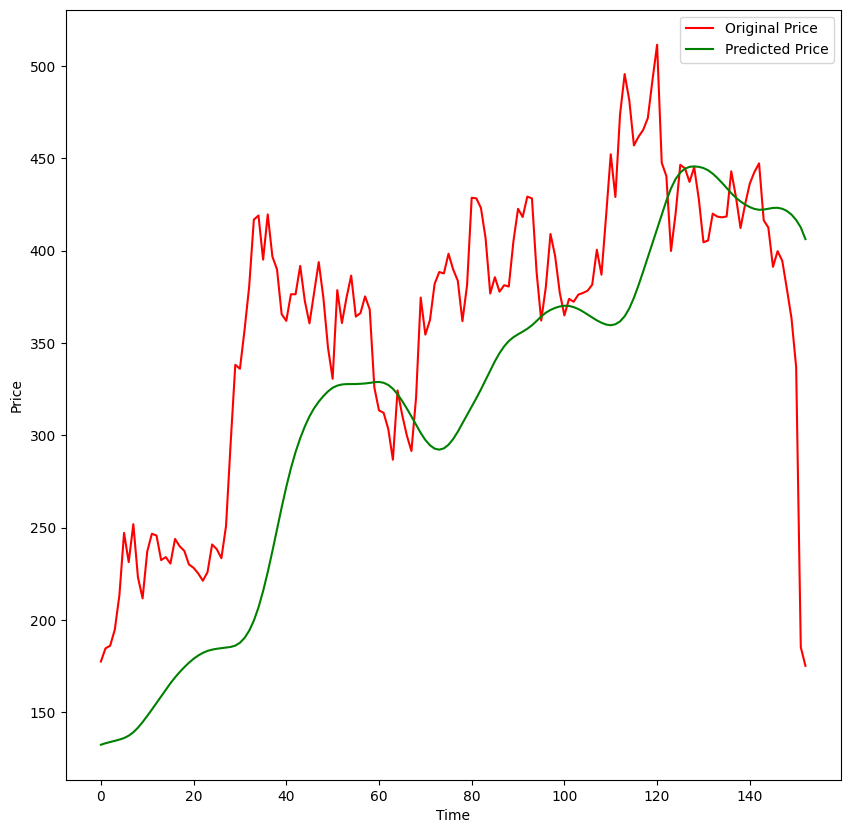

In [97]:
plt.figure(figsize = (10, 10))
plt.plot(y_test, 'r', label = "Original Price")
plt.plot(y_predicted, 'g', label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()